# **TALLER 05 - MÍNIMOS CUADRADOS**

**Nombre:** Camila Caicedo

**Curso:** GR1CC

**Fecha:** 09/12/2025

**A)  Interpole los puntos:**

p1 = (5.4, 3.2)

p2_i = (9.5, 0.7)

p3 = (12.3, -3.6)

**De estos, el punto $p2_i$ debe ser seleccionable y movible. Cree un programa que interpole una parábola en tiempo real para los tres puntos.**

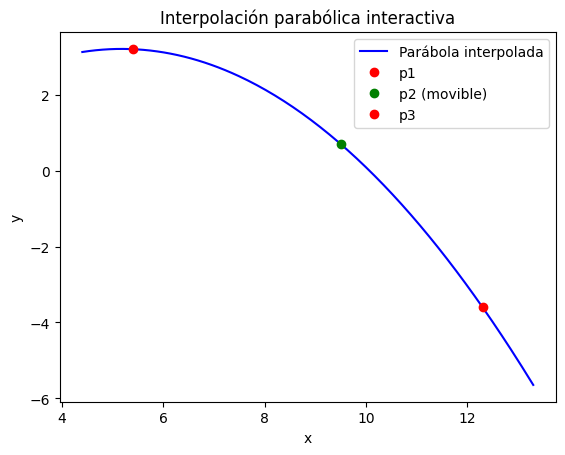

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Puntos iniciales
p1 = (5.4, 3.2)
p2 = [9.5, 0.7]   # lo dejamos como lista para poder modificarlo
p3 = (12.3, -3.6)

# Función que calcula los coeficientes de la parábola a partir de tres puntos
def parabola_coeffs(p1, p2, p3):
    # Sistema lineal: y = ax^2 + bx + c
    A = np.array([
        [p1[0]**2, p1[0], 1],
        [p2[0]**2, p2[0], 1],
        [p3[0]**2, p3[0], 1]
    ])
    Y = np.array([p1[1], p2[1], p3[1]])
    a, b, c = np.linalg.solve(A, Y)
    return a, b, c

# Función para actualizar la curva
def update_curve():
    a, b, c = parabola_coeffs(p1, p2, p3)
    xs = np.linspace(min(p1[0], p2[0], p3[0]) - 1,
                     max(p1[0], p2[0], p3[0]) + 1, 200)
    ys = a*xs**2 + b*xs + c
    curve.set_data(xs, ys)
    point2.set_data(p2[0], p2[1])
    fig.canvas.draw_idle()

# Crear figura
fig, ax = plt.subplots()
ax.set_title("Interpolación parabólica interactiva")
ax.set_xlabel("x")
ax.set_ylabel("y")

# Dibujar curva inicial
a, b, c = parabola_coeffs(p1, p2, p3)
xs = np.linspace(min(p1[0], p2[0], p3[0]) - 1,
                 max(p1[0], p2[0], p3[0]) + 1, 200)
ys = a*xs**2 + b*xs + c
curve, = ax.plot(xs, ys, 'b-', label="Parábola interpolada")

# Dibujar puntos
ax.plot(p1[0], p1[1], 'ro', label="p1")
point2, = ax.plot(p2[0], p2[1], 'go', label="p2 (movible)")
ax.plot(p3[0], p3[1], 'ro', label="p3")

ax.legend()

# Función para arrastrar p2
def on_press(event):
    if event.inaxes != ax: return
    contains, _ = point2.contains(event)
    if contains:
        fig.canvas.mpl_connect('motion_notify_event', on_motion)

def on_motion(event):
    if event.inaxes != ax: return
    p2[0], p2[1] = event.xdata, event.ydata
    update_curve()

def on_release(event):
    fig.canvas.mpl_disconnect(fig.canvas.mpl_connect('motion_notify_event', on_motion))

# Conectar eventos
fig.canvas.mpl_connect('button_press_event', on_press)
fig.canvas.mpl_connect('button_release_event', on_release)

plt.show()


**B) Interpole el siguiente conjunto de datos:**

xs = [

    0.0003,
    0.0822,
    0.2770,
    0.4212,
    0.4403,
    0.5588,
    0.5943,
    0.6134,
    0.9070,
    1.0367,
    1.1903,
    1.2511,
    1.2519,
    1.2576,
    1.6165,
    1.6761,
    2.0114,
    2.0557,
    2.1610,
    2.6344,
]

ys = [

    1.1017,
    1.5021,
    0.3844,
    1.3251,
    1.7206,
    1.9453,
    0.3894,
    0.3328,
    1.2887,
    3.1239,
    2.1778,
    3.1078,
    4.1856,
    3.3640,
    6.0330,
    5.8088,
    10.5890,
    11.5865,
    11.8221,
    26.5077,
]